### Machine learning in geoscience with scikit-learn - notebook 2 bis
Matteo Niccoli, MyCarta - Calgary, Alberta, Canada

mycarta.wordpress.com

matteo@mycarta.ca

##### This short notebook is to prepare an extra independent variable (feature) to be used in notebook 2.

In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import seaborn as sns
import math

%matplotlib inline

In [3]:
data = pd.read_csv('Table2_Hunt_2013_nonames.csv')

In [4]:
data.describe()

,X1,X2,X3,X4,X5,X6,Y
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,9.823810,68.880952,1.885714,15.285714,10.190476,292.714286,33.428571
std,5.948521,45.167894,0.708721,2.759400,6.439092,59.429069,15.141909
min,0.100000,0.500000,1.000000,10.000000,1.000000,210.000000,7.710000
25%,4.900000,24.600000,1.100000,14.000000,6.000000,245.000000,22.670000
50%,10.000000,72.900000,2.000000,16.000000,10.000000,273.000000,36.420000
75%,15.100000,100.000000,2.200000,17.000000,13.000000,340.000000,44.200000
max,19.100000,160.000000,2.900000,20.000000,21.000000,395.000000,59.200000


We will create a fake variable by applying a simple function to X1. This is to simulate the presence of 2 features that correlate highly between one another.

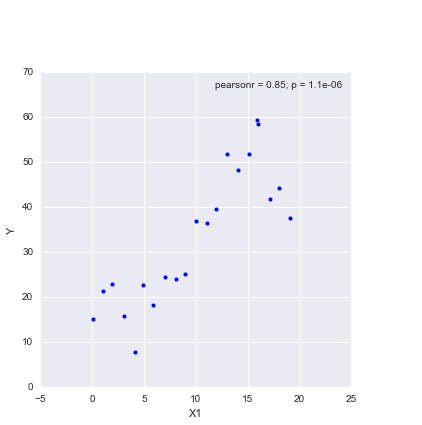

In [5]:
g = sns.JointGrid(data['X1'], data['Y'])
g = g.plot_joint(plt.scatter, color="b", edgecolor="white")
g.ax_marg_x.set_axis_off()
g.ax_marg_y.set_axis_off()
g = g.annotate(sp.stats.pearsonr)

We can apply a simple logarithmic function.

In [6]:
X07 = pd.Series(np.log(data['X1'])+data['X1']+5)

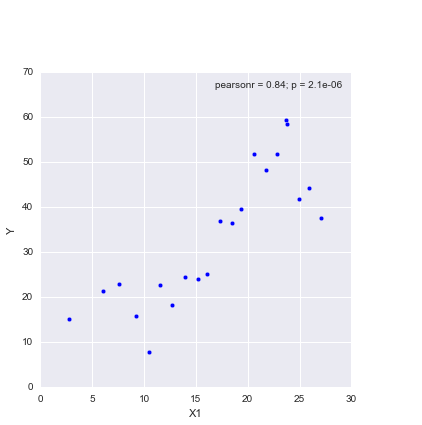

In [7]:
g = sns.JointGrid(X07, data['Y'])
g = g.plot_joint(plt.scatter, color="b", edgecolor="white")
g.ax_marg_x.set_axis_off()
g.ax_marg_y.set_axis_off()
g = g.annotate(sp.stats.pearsonr)

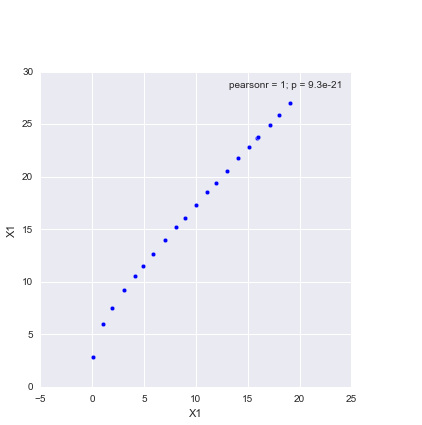

In [8]:
g = sns.JointGrid(data['X1'], X07)
g = g.plot_joint(plt.scatter, color="b", edgecolor="white")
g.ax_marg_x.set_axis_off()
g.ax_marg_y.set_axis_off()
g = g.annotate(sp.stats.pearsonr)

Let's add a bit of random noise to it.

In [9]:
np.random.seed(42)
noise = np.random.normal(0,1.5,len(X07))
X7 = pd.Series(X07 + noise)

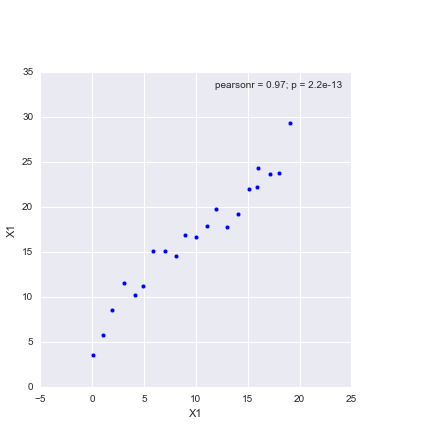

In [10]:
g = sns.JointGrid(data['X1'], X7)
g = g.plot_joint(plt.scatter, color="b", edgecolor="white")
g.ax_marg_x.set_axis_off()
g.ax_marg_y.set_axis_off()
g = g.annotate(sp.stats.pearsonr)

In [11]:
data.insert(loc=6, column='X7', value=X7) 

In [12]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,Y
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,9.823810,68.880952,1.885714,15.285714,10.190476,292.714286,16.579006,33.428571
std,5.948521,45.167894,0.708721,2.759400,6.439092,59.429069,6.543232,15.141909
min,0.100000,0.500000,1.000000,10.000000,1.000000,210.000000,3.542486,7.710000
25%,4.900000,24.600000,1.100000,14.000000,6.000000,245.000000,11.515947,22.670000
50%,10.000000,72.900000,2.000000,16.000000,10.000000,273.000000,16.899891,36.420000
75%,15.100000,100.000000,2.200000,17.000000,13.000000,340.000000,21.971263,44.200000
max,19.100000,160.000000,2.900000,20.000000,21.000000,395.000000,29.248161,59.200000


Et voilà. We are done. All we are left to do is save the Datafram to a csv file.

In [13]:
data.to_csv('Table2_Hunt_2013_edit_noNames.csv', index=False, float_format='%11.2f')

We can also add the column names and save to a different csv file.

In [14]:
data = data.rename(columns={'X1': 'Gross pay', 
                        'X2': 'Phi-h',
                        'X3': 'Position',
                        'X4': 'Pressure',
                        'X5': 'Random 1',
                        'X6': 'Random 2',
                        'X7': 'Gross pay transform',
                         'Y': 'Production'})

data.describe()

,Gross pay,Phi-h,Position,Pressure,Random 1,Random 2,Gross pay transform,Production
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,9.823810,68.880952,1.885714,15.285714,10.190476,292.714286,16.579006,33.428571
std,5.948521,45.167894,0.708721,2.759400,6.439092,59.429069,6.543232,15.141909
min,0.100000,0.500000,1.000000,10.000000,1.000000,210.000000,3.542486,7.710000
25%,4.900000,24.600000,1.100000,14.000000,6.000000,245.000000,11.515947,22.670000
50%,10.000000,72.900000,2.000000,16.000000,10.000000,273.000000,16.899891,36.420000
75%,15.100000,100.000000,2.200000,17.000000,13.000000,340.000000,21.971263,44.200000
max,19.100000,160.000000,2.900000,20.000000,21.000000,395.000000,29.248161,59.200000


In [15]:
data.to_csv('Table2_Hunt_2013_edit.csv', index=False, float_format='%11.2f')